In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline
# %matplotlib widget

In [69]:
der = 180/np.pi
der


57.29577951308232

In [70]:
x=90
np.sin(x/der)

1.0

Parameter Elongasi

In [71]:
# Bo = 180.242
# k = 1.117

Bo = 180.243
k = 1.121

# Bo = 180.247
# k = 1.165

# Bo = 180
# k = 0.8

hm = np.linspace(2, 18, 140)
hs = np.linspace(-15, -1, 140)
x = 1/(np.cos((90-hm)/der) + 0.025*np.exp(-11*np.cos((90-hm)/der)))

In [72]:
def Bn(hm):
    return Bo*(0.4 + 0.6/(np.sqrt(1 - (0.96*np.sin((90-hm)/der)*np.sin((90-hm)/der)))))*(10**(-0.4*k*x))
    # return Bo*(0.4 + 0.6/(np.sqrt((1-0.96*math.pow(np.sin((90-hm)/der))), 2)))*(10**(-0.4*k*x))

def Bt(hs, hm, el):
    return np.maximum(1, 10**((el/90)-1.1))*(10**(8.45+(0.4*hs)))*(1-(10**(-0.4*k*x)))

def Bs(hm, el):
    alfa = (180-el)
    Luas = (1/8)*((15*np.pi/(60*180))**2)*(1+np.cos(alfa/(180/np.pi)))
#     Luas = 0.5*np.pi*((0.00436332)**2)*(1+np.cos(alfa/(180/np.pi)))
    m_moon = -12.73 + (0.026*np.absolute(alfa)) + (alfa**4)*(4e-9)
    I_moonL = 10**((m_moon+16.57)/(-2.5))
    I_moon = I_moonL*(10**(-1*k*x/2.5))
    konv_B = (2.95e-7)*Luas
    return I_moon/konv_B


In [73]:
el = 16
hmo, hsu = np.meshgrid(hm, hs)
Bsky = Bn(hmo) + Bt(hsu, hmo, el)
c= Bs(hmo, el)/Bsky-1
batas = hmo - hsu
lala = np.select([batas <= el, batas > el], [c, np.NaN])
lala

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.99999996, -0.99999993, -0.99999988, ...,         nan,
                nan,         nan],
       [-0.99999997, -0.99999994, -0.99999989, ...,         nan,
                nan,         nan],
       [-0.99999997, -0.99999994, -0.9999999 , ...,         nan,
                nan,         nan]])

Text(0.5, 0, 'c')

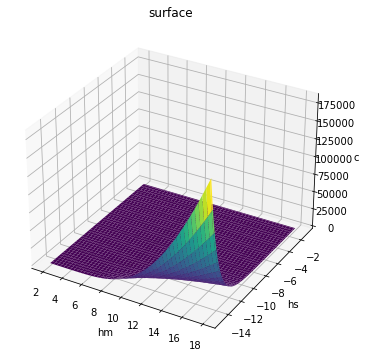

In [74]:
#plot 3d
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(hmo, hsu, c, cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('hm')
ax.set_ylabel('hs')
ax.set_zlabel('c')


Text(0.5, 0, 'c')

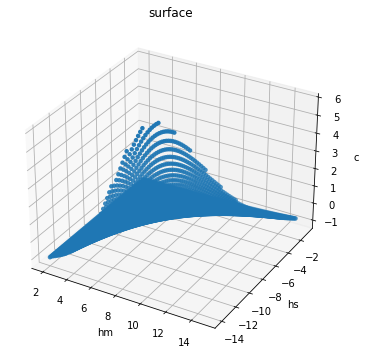

In [75]:
#plot 3d scatter
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hmo, hsu, lala, cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('hm')
ax.set_ylabel('hs')
ax.set_zlabel('c')


C:\Users\User\AppData\Local\Temp/ipykernel_3028/4037610646.py:4: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  ax.contour(hmo, hsu, lala, cmap='viridis', edgecolor='none')


Text(0.5, 0, 'c')

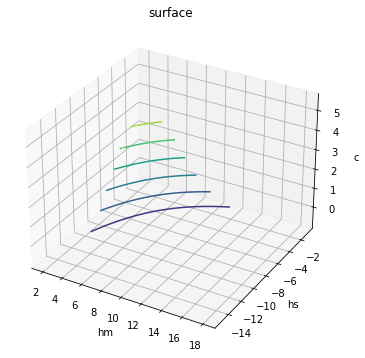

In [76]:
#plot contour
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.contour(hmo, hsu, lala, cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('hm')
ax.set_ylabel('hs')
ax.set_zlabel('c')


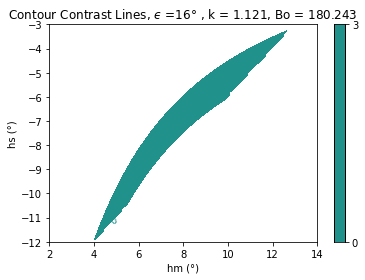

In [77]:
fig,ax=plt.subplots(1,1)
# cp = ax.contour(hmo, hsu, c, [0, 5, 10, 15, 20, 50, 100])
# cp = ax.contour(hmo, hsu, lala)
cp = ax.contourf(hmo, hsu, lala, [0, 3])
fig.colorbar(cp) # Add a colorbar to a plot
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Contrast Lines, $ϵ$ =' + str(el) + '° , k = ' + str(k) + ', Bo = ' + str(Bo))
ax.set_xlabel('hm (°)')
ax.set_ylabel('hs (°)')
ax.set_xlim(2, 14)
ax.set_ylim(-12, -3)
plt.show()

In [78]:
az = 2
h = np.sqrt(el**2 - az**2)

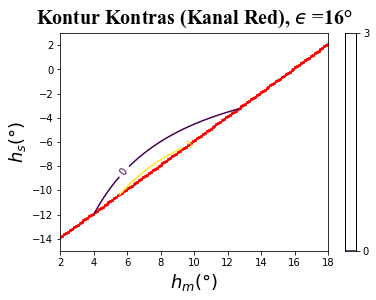

In [79]:
fig,ax=plt.subplots(1,1)
# cp = ax.contour(hmo, hsu, c, [0, 5, 10, 15, 20, 50, 100])
cp = ax.contour(hmo, hsu, lala, [0,3])
# cp = ax.contour(hmo, hsu, lala, [0, 1, 2, 8])
# cp = ax.contour(hmo, hsu, lala, [-0.8, 0, 1, 1.5, 2, 8])

fig.colorbar(cp) # Add a colorbar to a plot
ax.clabel(cp, inline=True, fontsize=10)
# ax.set_title('Contour Contrast Lines (Red Channel), $ϵ$ =' + str(el) + '° , k = ' + str(k) + ', Bo = ' + str(Bo))
ax.set_title('Kontur Kontras (Kanal Red), $ϵ$ =' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')
# ax.set_title('Kontur Kontras (Kanal Green), $ϵ$ =' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')
# ax.set_title('Kontur Kontras (Kanal Blue), $ϵ$ =' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')


ax.set_xlabel('$h_{m} (°)$', size=18, fontweight='bold')
ax.set_ylabel('$h_{s} (°)$', size=18, fontweight='bold')

hs = hm - h
plt.scatter(hm, hs, c='r', marker='x', s=5)


plt.show()

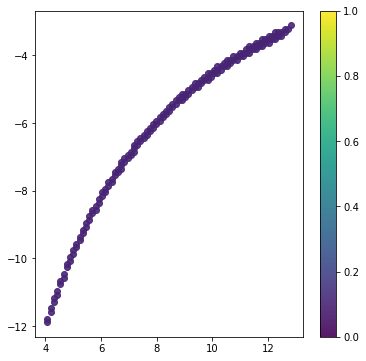

hmo max =  12.820143884892087
hmo min =  4.071942446043165
hsu max =  -3.115107913669066
hsu min =  -11.877697841726619


In [80]:
import matplotlib.cm as cm

cmap = cm.get_cmap('viridis')

m = 0.1
plt.figure(figsize=(6, 6))
mask = (lala < m)*(lala > -m)
# plot scatter hmo and hsu for mask with different color for each m
plt.scatter(hmo[mask], hsu[mask], color=cmap(m), alpha=1-m)
# plt.plot(hmo[mask], hsu[mask])
plt.colorbar()
# colorbar limit from 0.1 to 0.5
# plt.clim(0.1, 0.5)
plt.show()

# find max min hmo and hsu for mask
print("hmo max = ", np.max(hmo[mask]))
print("hmo min = ", np.min(hmo[mask]))
print("hsu max = ", np.max(hsu[mask]))
print("hsu min = ", np.min(hsu[mask]))

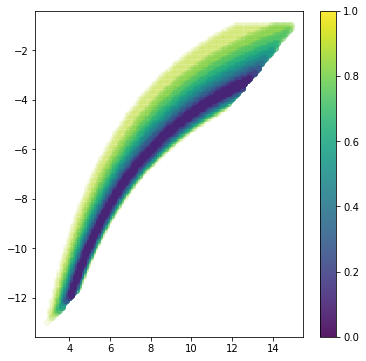

In [81]:
import matplotlib.cm as cm

cmap = cm.get_cmap('viridis')

ms = np.linspace(0.1, 0.9, 10)
plt.figure(figsize=(6, 6))
for m in ms[::-1]:
    mask = (lala < m)*(lala > -m)
    # plot scatter hmo and hsu for mask with different color for each m
    plt.scatter(hmo[mask], hsu[mask], color=cmap(m), alpha=1-m)
    # plt.plot(hmo[mask], hsu[mask])
plt.colorbar()
# colorbar limit from 0.1 to 0.5
# plt.clim(0.1, 0.5)
plt.show()

    # find max min hmo and hsu for mask
    # print("hmo max = ", np.max(hmo[mask]))
    # print("hmo min = ", np.min(hmo[mask]))
    # print("hsu max = ", np.max(hsu[mask]))
    # print("hsu min = ", np.min(hsu[mask]))

elongation = 4°
elongation = 5°
elongation = 6°
elongation = 7°
elongation = 8°
elongation = 9°
elongation = 10°
elongation = 11°
elongation = 12°
elongation = 13°
elongation = 14°


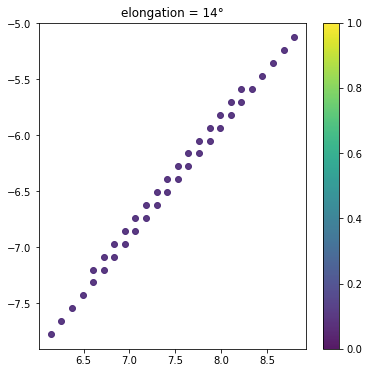

hmo max, 14°=  8.79136690647482
hmo min, 14°=  6.143884892086331
hsu max, 14°=  -5.126306427538623
hsu min, 14°=  -7.7737884419271115
elongation = 15°


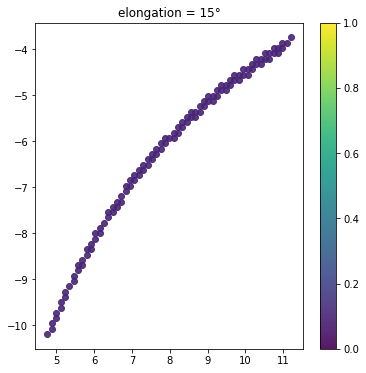

hmo max, 15°=  11.20863309352518
hmo min, 15°=  4.7625899280575545
hsu max, 15°=  -3.7450114635098455
hsu min, 15°=  -10.191054628977472
elongation = 16°


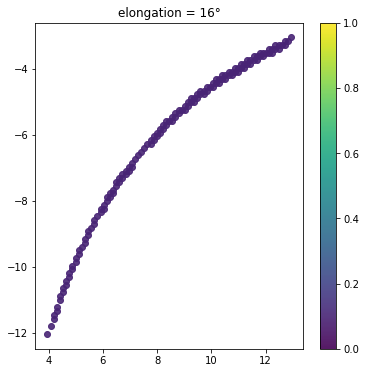

hmo max, 16°=  12.935251798561152
hmo min, 16°=  3.956834532374101
hsu max, 16°=  -3.0543639814954577
hsu min, 16°=  -12.032781247682507
elongation = 17°


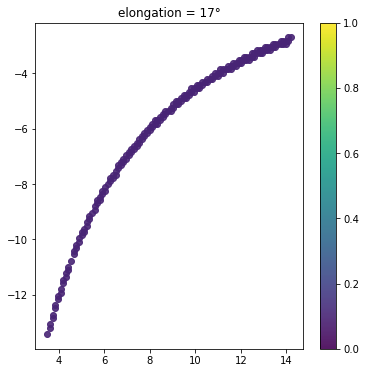

hmo max, 17°=  14.201438848920864
hmo min, 17°=  3.4964028776978417
hsu max, 17°=  -2.709040240488264
hsu min, 17°=  -13.414076211711286
elongation = 18°


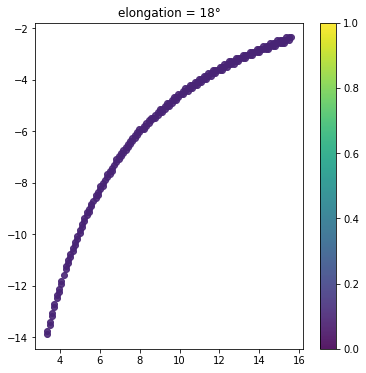

hmo max, 18°=  15.582733812949641
hmo min, 18°=  3.3812949640287773
hsu max, 18°=  -2.363716499481068
hsu min, 18°=  -13.874507866387544
elongation = 19°


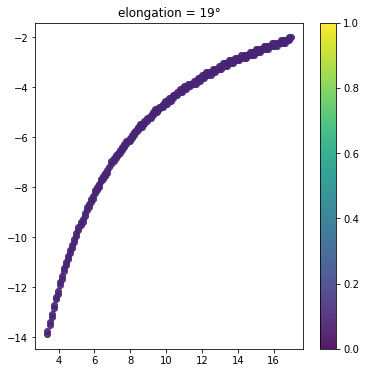

hmo max, 19°=  16.964028776978417
hmo min, 19°=  3.3812949640287773
hsu max, 19°=  -2.0183927584738743
hsu min, 19°=  -13.874507866387544


In [82]:
cmap = cm.get_cmap('viridis')

for el in range(4, 20, 1):
    hmo, hsu = np.meshgrid(hm, hs)
    Bsky = Bn(hmo) + Bt(hsu, hmo, el)
    c= Bs(hmo, el)/Bsky-1
    batas = hmo - hsu
    lala = np.select([batas <= el, batas > el], [c, np.NaN])
    
    m = 0.1
    
    mask = (lala < m)*(lala > -m)
    print("elongation = " + str(el) + "°")
    if mask.sum() == 0:
        continue
    plt.figure(figsize=(6, 6))
    # plot scatter hmo and hsu for mask with different color for each m
    plt.scatter(hmo[mask], hsu[mask], color=cmap(m), alpha=1-m)
    # plt.plot(hmo[mask], hsu[mask])
    plt.title('elongation = ' + str(el) + '°')
    plt.colorbar()
    #   colorbar limit from 0.1 to 0.5
    # plt.clim(0.1, 0.5)
    plt.show()

    # find max min hmo and hsu for mask
    print('hmo max, ' + str(el) + '°' + '= ', np.max(hmo[mask]))
    print('hmo min, ' + str(el) + '°' + '= ', np.min(hmo[mask]))
    print('hsu max, ' + str(el) + '°' + '= ', np.max(hsu[mask]))
    print('hsu min, ' + str(el) + '°' + '= ', np.min(hsu[mask]))

In [83]:
cmap = cm.get_cmap('viridis')
el_min = 0

# plt.figure(figsize=(6, 6))
up = 16
# up = 4
delta = 0.1
for i in range(20):
    for el in np.arange(up, 5, -delta):
        hmo, hsu = np.meshgrid(hm, hs)
        Bsky = Bn(hmo) + Bt(hsu, hmo, el)
        c= Bs(hmo, el)/Bsky-1
        batas = hmo - hsu
        lala = np.select([batas <= el, batas > el], [c, np.NaN])
        
        m = 0.01
        
        mask = (lala < m)*(lala > -m)
        # print("elongation = " + str(el) + "°")
        if mask.sum() == 0:
            delta /= 2
            up = el+delta
            if (i+1) % 10 == 0:
                print(str(i+1) + ' elongation = ' + str(el) + '°')
            break
el_min = up


10 elongation = 13.917578125000007°
20 elongation = 13.917673301696784°


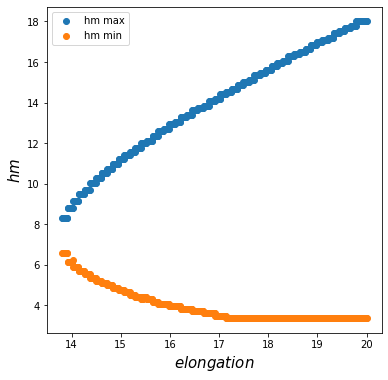

In [84]:
cmap = cm.get_cmap('viridis')


els = []
hm_mins = []
hm_maxs = []

for el in np.arange(20, 13, -0.01):
    hmo, hsu = np.meshgrid(hm, hs)
    Bsky = Bn(hmo) + Bt(hsu, hmo, el)
    c= Bs(hmo, el)/Bsky-1
    batas = hmo - hsu
    lala = np.select([batas <= el, batas > el], [c, np.NaN])
    
    m = 0.1
    
    mask = (lala < m)*(lala > -m)
    # print("elongation = " + str(el) + "°")
    if mask.sum() == 0:
        break
    hm_mins.append(np.min(hmo[mask]))
    hm_maxs.append(np.max(hmo[mask]))
    els.append(el)

# plot els vs hm_mins and hm_maxs
plt.figure(figsize=(6, 6))
plt.scatter(els, hm_maxs, label='hm max')
plt.scatter(els, hm_mins, label='hm min')
plt.xlabel('$elongation$', size=15)
plt.ylabel('$hm$', size=15)
plt.legend()
plt.show()


c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


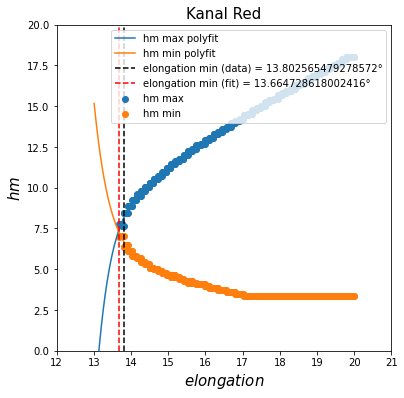

In [65]:
# polyfit Red
orde = 10
p_min = np.polyfit(els, hm_mins, orde)
p_max = np.polyfit(els, hm_maxs, orde)

# create el range
els_ = np.arange(20,13, -0.01)
hmins = np.polyval(p_min, els_)
hmaxs = np.polyval(p_max, els_)

# find elongation where hmo min and hmo max are equal
elongation = np.interp(0, hmins-hmaxs, els_)

# plot polyfit
plt.figure(figsize=(6, 6))
plt.scatter(els, hm_maxs, label='hm max')
plt.scatter(els, hm_mins, label='hm min')
plt.plot(els_, hmaxs, label='hm max polyfit')
plt.plot(els_, hmins, label='hm min polyfit')
plt.axvline(el_min, color='k', linestyle='--', label=f'elongation min (data) = {el_min}°')
plt.axvline(elongation, color='r', linestyle='--', label='elongation min (fit) = ' + str(elongation) + '°')
plt.xlabel('$elongation$', size=15)
plt.ylabel('$hm$', size=15)
plt.title('Kanal Red', size=15)
plt.xlim(12, 21)
plt.ylim(0, 20)
plt.legend(loc='upper right')
plt.show()


c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


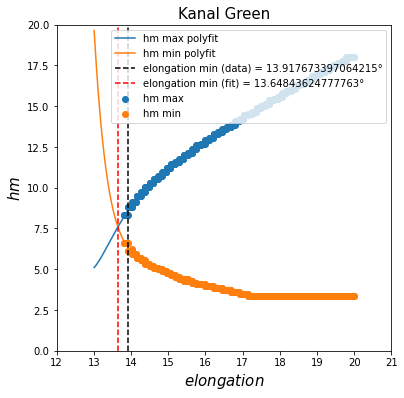

In [86]:
# polyfit Green
orde = 10
p_min = np.polyfit(els, hm_mins, orde)
p_max = np.polyfit(els, hm_maxs, orde)

# create el range
els_ = np.arange(20,13, -0.01)
hmins = np.polyval(p_min, els_)
hmaxs = np.polyval(p_max, els_)

# find elongation where hmo min and hmo max are equal
elongation = np.interp(0, hmins-hmaxs, els_)

# plot polyfit
plt.figure(figsize=(6, 6))
plt.scatter(els, hm_maxs, label='hm max')
plt.scatter(els, hm_mins, label='hm min')
plt.plot(els_, hmaxs, label='hm max polyfit')
plt.plot(els_, hmins, label='hm min polyfit')
plt.axvline(el_min, color='k', linestyle='--', label=f'elongation min (data) = {el_min}°')
plt.axvline(elongation, color='r', linestyle='--', label='elongation min (fit) = ' + str(elongation) + '°')
plt.xlabel('$elongation$', size=15)
plt.ylabel('$hm$', size=15)
plt.title('Kanal Green', size=15)
plt.xlim(12, 21)
plt.ylim(0, 20)
plt.legend(loc='upper right')   
plt.show()


c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


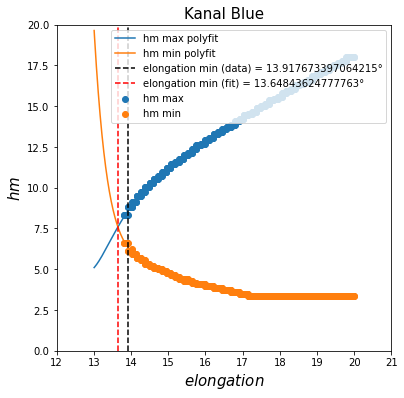

In [85]:
# polyfit Blue
orde = 10
p_min = np.polyfit(els, hm_mins, orde)
p_max = np.polyfit(els, hm_maxs, orde)

# create el range
els_ = np.arange(20,13, -0.01)
hmins = np.polyval(p_min, els_)
hmaxs = np.polyval(p_max, els_)

# find elongation where hmo min and hmo max are equal
elongation = np.interp(0, hmins-hmaxs, els_)

# plot polyfit
plt.figure(figsize=(6, 6))
plt.scatter(els, hm_maxs, label='hm max')
plt.scatter(els, hm_mins, label='hm min')
plt.plot(els_, hmaxs, label='hm max polyfit')
plt.plot(els_, hmins, label='hm min polyfit')
plt.axvline(el_min, color='k', linestyle='--', label=f'elongation min (data) = {el_min}°')
plt.axvline(elongation, color='r', linestyle='--', label='elongation min (fit) = ' + str(elongation) + '°')
plt.xlabel('$elongation$', size=15)
plt.ylabel('$hm$', size=15)
plt.title('Kanal Blue', size=15)
plt.xlim(12, 21)
plt.ylim(0, 20)
plt.legend(loc='upper right')
plt.show()


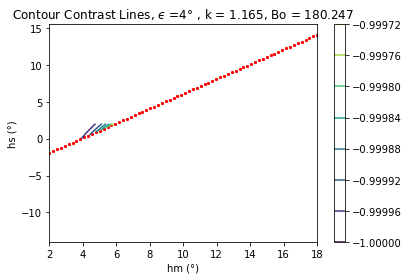

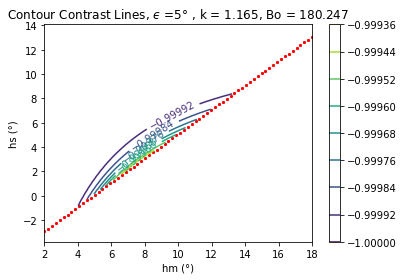

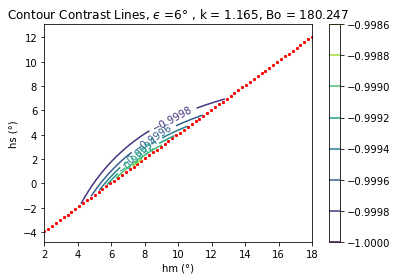

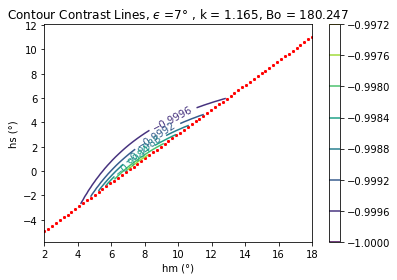

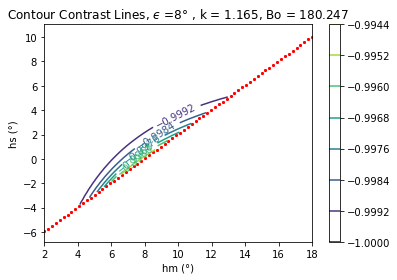

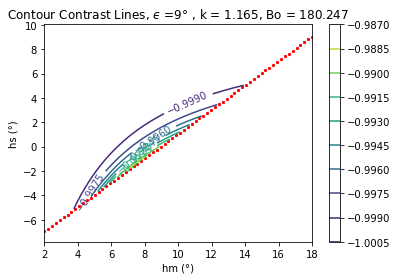

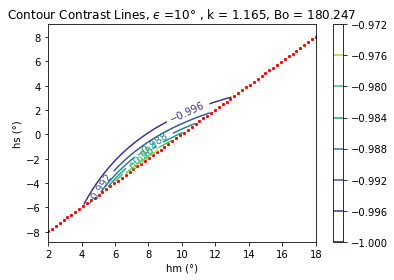

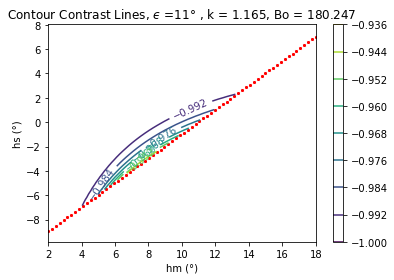

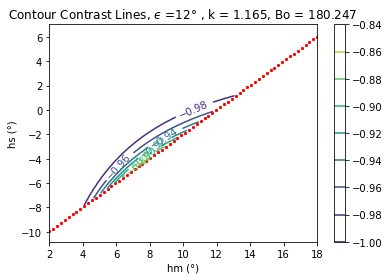

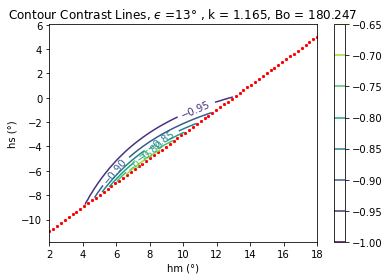

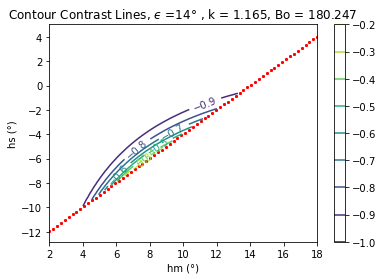

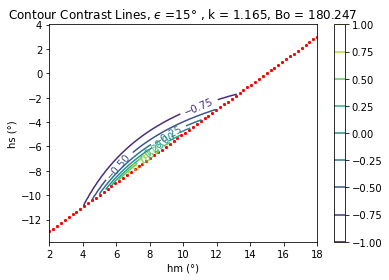

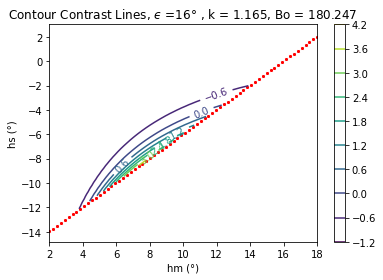

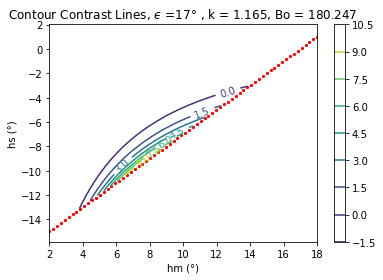

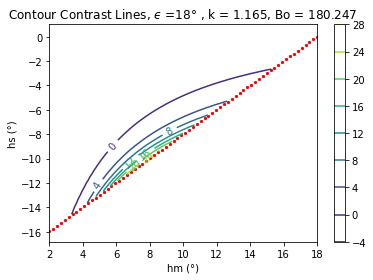

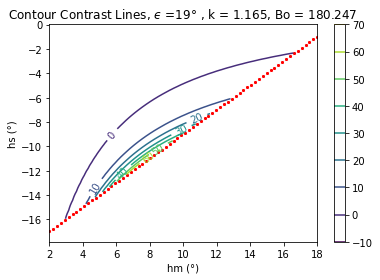

In [95]:
az = 0.8
for el in range(4, 20, 1):
    hmo, hsu = np.meshgrid(hm, hs)
    Bsky = Bn(hmo) + Bt(hsu, hmo, el)
    c= Bs(hmo, el)/Bsky-1
    batas = hmo - hsu
    lala = np.select([batas <= el, batas > el], [c, np.NaN])

    fig,ax=plt.subplots(1,1)
    # cp = ax.contour(hmo, hsu, c, [0, 5, 10, 15, 20, 50, 100])
    cp = ax.contour(hmo, hsu, lala)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.clabel(cp, inline=True, fontsize=10)
    ax.set_title('Contour Contrast Lines, $ϵ$ =' + str(el) + '° , k = ' + str(k) + ', Bo = ' + str(Bo))
    ax.set_xlabel('hm (°)')
    ax.set_ylabel('hs (°)')
    h = np.sqrt(el**2 - az**2)
    hs = hm - h
    plt.scatter(hm, hs, c='r', marker='x', s=5)
    plt.show()

In [15]:
az = 4
el = 5
h = np.sqrt(el**2 - az**2)
print(h)


3.0


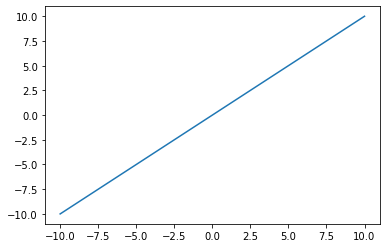

In [16]:
# plot y = x
x = np.linspace(-10, 10, 100)
y = x
plt.plot(x, y, label='y = x')
plt.show()

In [17]:
az = 0.68
for el in range (4, 20, 1):
    h = np.sqrt(el**2 - az**2)
    print(h)

3.941776249357642
4.953544185732071
5.961342130762166
6.966893138264717
7.971047609944379
8.974274343923302
9.976853211308663
10.978961699541538
11.980717841598642
12.98220320284658
13.983475962721142
14.98457873949081
15.985543469022252
16.986394555643642
17.987150969511543
18.987827679858484


In [18]:
el = 6
el1 = 7
el2 = 8
el3 = 9
el4 = 10
el5 = 11
el6 = 12
el7 = 13
el8 = 14
el9 = 15
el10 = 16
el11 = 17
el12 = 18
el13 = 19

hmo, hsu = np.meshgrid(hm, hs)
Bsky = Bn(hmo) + Bt(hsu, hmo, el)
Bsky1 = Bn(hmo) + Bt(hsu, hmo, el1)
Bsky2 = Bn(hmo) + Bt(hsu, hmo, el2)
Bsky3 = Bn(hmo) + Bt(hsu, hmo, el3)
Bsky4 = Bn(hmo) + Bt(hsu, hmo, el4)
Bsky5 = Bn(hmo) + Bt(hsu, hmo, el5)
Bsky6 = Bn(hmo) + Bt(hsu, hmo, el6)
Bsky7 = Bn(hmo) + Bt(hsu, hmo, el7)
Bsky8 = Bn(hmo) + Bt(hsu, hmo, el8)
Bsky9 = Bn(hmo) + Bt(hsu, hmo, el9)
Bsky10 = Bn(hmo) + Bt(hsu, hmo, el10)
Bsky11 = Bn(hmo) + Bt(hsu, hmo, el11)
Bsky12 = Bn(hmo) + Bt(hsu, hmo, el12)
Bsky13 = Bn(hmo) + Bt(hsu, hmo, el13)

c= Bs(hmo, el)/Bsky-1
c1= Bs(hmo, el1)/Bsky1-1
c2= Bs(hmo, el2)/Bsky2-1
c3= Bs(hmo, el3)/Bsky3-1
c4= Bs(hmo, el4)/Bsky4-1
c5= Bs(hmo, el5)/Bsky5-1
c6= Bs(hmo, el6)/Bsky6-1
c7= Bs(hmo, el7)/Bsky7-1
c8= Bs(hmo, el8)/Bsky8-1
c9= Bs(hmo, el9)/Bsky9-1
c10= Bs(hmo, el10)/Bsky10-1
c11= Bs(hmo, el11)/Bsky11-1
c12= Bs(hmo, el12)/Bsky12-1
c13= Bs(hmo, el13)/Bsky13-1

batas = hmo - hsu

lala = np.select([batas <= el, batas > el], [c, np.NaN])
lala1 = np.select([batas <= el1, batas > el1], [c1, np.NaN])
lala2 = np.select([batas <= el2, batas > el2], [c2, np.NaN])
lala3 = np.select([batas <= el3, batas > el3], [c3, np.NaN])
lala4 = np.select([batas <= el4, batas > el4], [c4, np.NaN])
lala5 = np.select([batas <= el5, batas > el5], [c5, np.NaN])
lala6 = np.select([batas <= el6, batas > el6], [c6, np.NaN])
lala7 = np.select([batas <= el7, batas > el7], [c7, np.NaN])
lala8 = np.select([batas <= el8, batas > el8], [c8, np.NaN])
lala9 = np.select([batas <= el9, batas > el9], [c9, np.NaN])
lala10 = np.select([batas <= el10, batas > el10], [c10, np.NaN])
lala11 = np.select([batas <= el11, batas > el11], [c11, np.NaN])
lala12 = np.select([batas <= el12, batas > el12], [c12, np.NaN])
lala13 = np.select([batas <= el13, batas > el13], [c13, np.NaN])


fig,ax=plt.subplots(1,1)
cp = ax.contour(hmo, hsu, lala, [0], colors='black')
cp1 = ax.contour(hmo, hsu, lala1, [0], colors='red')
cp2 = ax.contour(hmo, hsu, lala2, [0], colors='blue')
cp3 = ax.contour(hmo, hsu, lala3, [0], colors='green')
cp4 = ax.contour(hmo, hsu, lala4, [0], colors='yellow')
cp5 = ax.contour(hmo, hsu, lala5, [0], colors='purple')
cp6 = ax.contour(hmo, hsu, lala6, [0], colors='pink')
cp7 = ax.contour(hmo, hsu, lala7, [0], colors='brown')
cp8 = ax.contour(hmo, hsu, lala8, [0], colors='orange')
cp9 = ax.contour(hmo, hsu, lala9, [0], colors='grey')
cp10 = ax.contour(hmo, hsu, lala10, [0], colors='cyan')
cp11 = ax.contour(hmo, hsu, lala11, [0], colors='magenta')
cp12 = ax.contour(hmo, hsu, lala12, [0], colors='olive')
cp13 = ax.contour(hmo, hsu, lala13, [0], colors='lime')

# fig.colorbar(cp) # Add a colorbar to a plot

ax.clabel(cp, inline=True, fontsize=10)
ax.clabel(cp1, inline=True, fontsize=10)
ax.clabel(cp2, inline=True, fontsize=10)
ax.clabel(cp3, inline=True, fontsize=10)
ax.clabel(cp4, inline=True, fontsize=10)
ax.clabel(cp5, inline=True, fontsize=10)
ax.clabel(cp6, inline=True, fontsize=10)
ax.clabel(cp7, inline=True, fontsize=10)
ax.clabel(cp8, inline=True, fontsize=10)
ax.clabel(cp9, inline=True, fontsize=10)
ax.clabel(cp10, inline=True, fontsize=10)
ax.clabel(cp11, inline=True, fontsize=10)
ax.clabel(cp12, inline=True, fontsize=10)
ax.clabel(cp13, inline=True, fontsize=10)

ax.set_title('Contour Contrast Lines, k='+ str(k) + ', Bo = ' + str(Bo))
ax.set_xlabel('hm (°)')
ax.set_ylabel('hs (°)')
# ax.set_xlim(11, 12)
# ax.set_ylim(-4, -3)

import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='el =' + str(el))
red_patch = mpatches.Patch(color='red', label='el =' + str(el1))
blue_patch = mpatches.Patch(color='blue', label='el =' + str(el2))
green_patch = mpatches.Patch(color='green', label='el =' + str(el3))
yellow_patch = mpatches.Patch(color='yellow', label='el =' + str(el4))
purple_patch = mpatches.Patch(color='purple', label='el =' + str(el5))
pink_patch = mpatches.Patch(color='pink', label='el =' + str(el6))
brown_patch = mpatches.Patch(color='brown', label='el =' + str(el7))
orange_patch = mpatches.Patch(color='orange', label='el =' + str(el8))
grey_patch = mpatches.Patch(color='grey', label='el =' + str(el9))
cyan_patch = mpatches.Patch(color='cyan', label='el =' + str(el10))
magenta_patch = mpatches.Patch(color='magenta', label='el =' + str(el11))
olive_patch = mpatches.Patch(color='olive', label='el =' + str(el12))
lime_patch = mpatches.Patch(color='lime', label='el =' + str(el13))

plt.legend(handles=[black_patch, red_patch, blue_patch, green_patch, yellow_patch, purple_patch, pink_patch, brown_patch, orange_patch, grey_patch, cyan_patch, magenta_patch, olive_patch, lime_patch], loc='upper left')

plt.show()

ValueError: operands could not be broadcast together with shapes (70,70) (100,) 